In [6]:
import numpy as np
import cv2
import os
import sys
import matplotlib.pyplot as plt

In [3]:
print("OpenCV Version:\t",cv2.__version__)

OpenCV Version:	 3.4.3


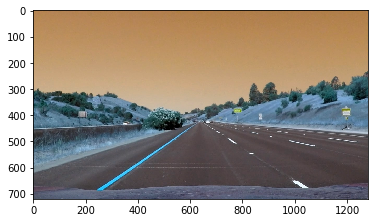

In [10]:
img = cv2.imread('Vehicle_Detection/images/lanes_1.jpg')
plt.imshow(img)

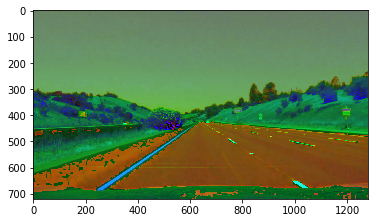

In [11]:
hls_im = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
plt.imshow(hls_im)

In [15]:
w_lower_b = np.array([0, 200, 0], dtype=np.uint8)
w_upper_b = np.array([200, 255, 255], dtype=np.uint8)
y_lower_b = np.array([10, 0, 100], dtype=np.uint8)
y_upper_b = np.array([40, 255, 255], dtype=np.uint8)

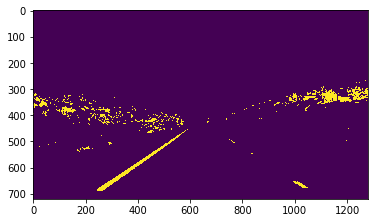

In [18]:
# Yellow Lanes
yellow_mask = cv2.inRange(hls_im,y_lower_b,y_upper_b)
plt.imshow(yellow_mask)

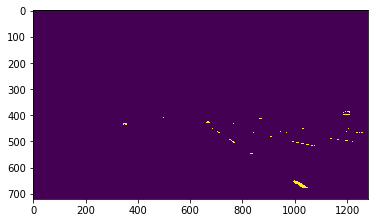

In [19]:
# White Lanes
white_mask = cv2.inRange(hls_im,w_lower_b,w_upper_b)
plt.imshow(white_mask)

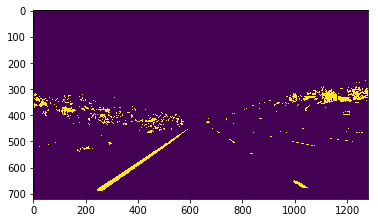

In [21]:
# Both types of lanes
combined_mask = cv2.bitwise_or(yellow_mask,white_mask)
plt.imshow(combined_mask)

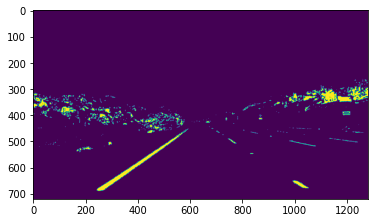

In [25]:
# Blur Masked Image
blurred_mask = cv2.GaussianBlur(combined_mask,(7,7),0)
plt.imshow(blurred_mask)

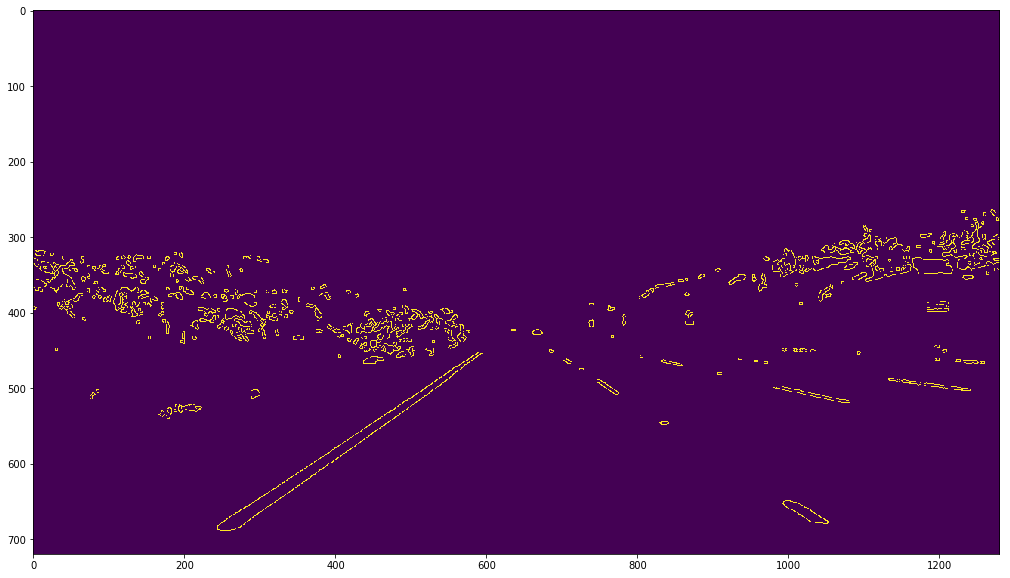

In [102]:
edges = cv2.Canny(blurred_mask,100,190)
plt.figure(figsize = (50,10))
plt.imshow(edges,interpolation='nearest')

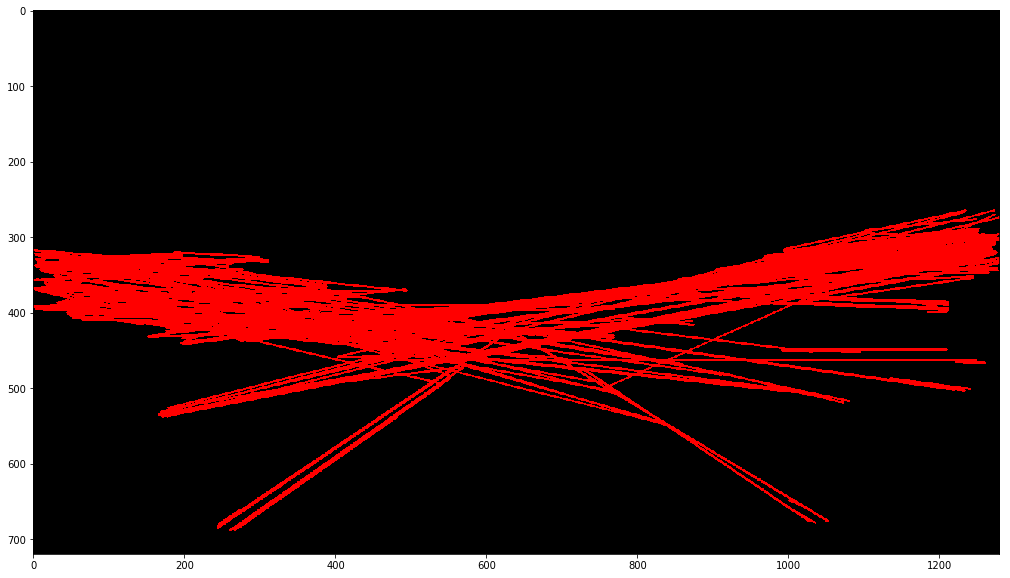

In [103]:
lines = cv2.HoughLinesP(edges,rho=1, theta=np.pi/180, threshold=20, minLineLength=20, maxLineGap=300)
rgb_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_img,(x1,y1),(x2,y2),color=[255, 0, 0],thickness=2)
        
plt.figure(figsize = (50,10))
plt.imshow(line_img)
test = edges.copy()

img rows=720 --- img cols=1280
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[  0 720]
[1280  720]
[512 432]
[768 432]
w =  256
h =  288


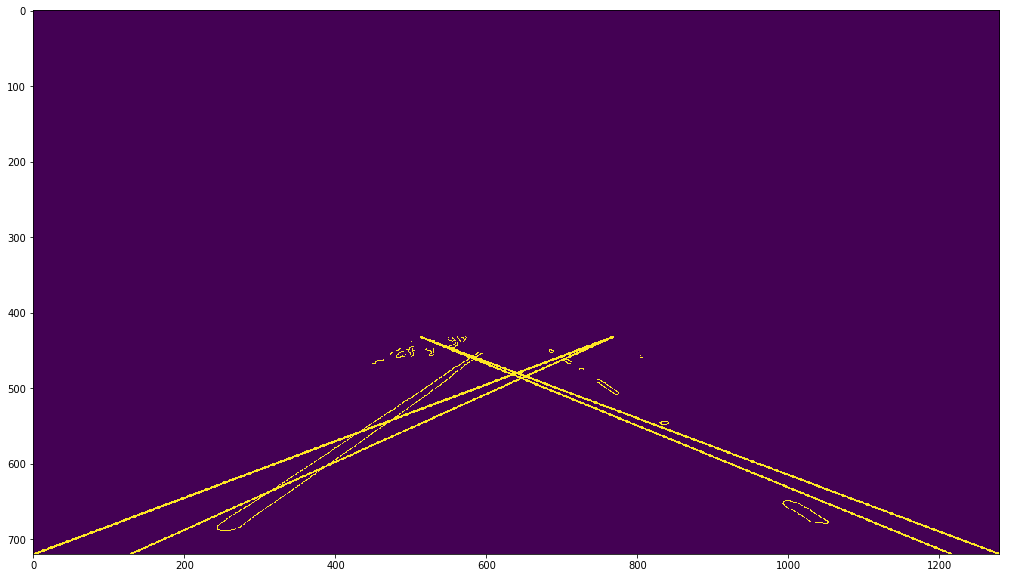

In [106]:
plt.close()
# Get ROI
def get_roi(img):
    rows, cols = img.shape[:2]
    print('img rows={} --- img cols={}'.format(rows,cols))
    mask = np.zeros_like(img)
    
    print(mask)
    
    left_bottom = np.array([int(cols * 0), int(rows)])
    right_bottom = np.array([int(cols * 1), int(rows)])
    left_top = np.array([int(cols * 0.4),int(rows * 0.6)])
    right_top = np.array([int(cols * 0.6), int(rows * 0.6)])
    
    print(left_bottom)
    print(right_bottom)
    print(left_top)
    print(right_top)
    w = right_top[0] - left_top[0]
    h = left_bottom[1] - left_top[1]
    print("w = ",w)
    print("h = ",h)
    cv2.line(img,tuple(left_bottom),tuple(right_top),color=[255, 0, 0],thickness=2)
    cv2.line(img,tuple(left_top),tuple(right_bottom),color=[255, 0, 0],thickness=2)
    #cv2.rectangle(img,tuple(left_top),(left_top[0]+w,left_top[1]+h),color=[255, 0, 0],thickness=2)
    
    vertices = np.array([[left_bottom, left_top, right_top, right_bottom]], dtype=np.int32)
    
    if len(mask.shape) == 2:
        cv2.fillPoly(mask, vertices, 255)
    else:
        cv2.fillPoly(mask, vertices, (255, ) * mask.shape[2])
    return cv2.bitwise_and(img, mask)

roi_im = get_roi(test)
plt.figure(figsize = (50,10))
plt.imshow(roi_im)

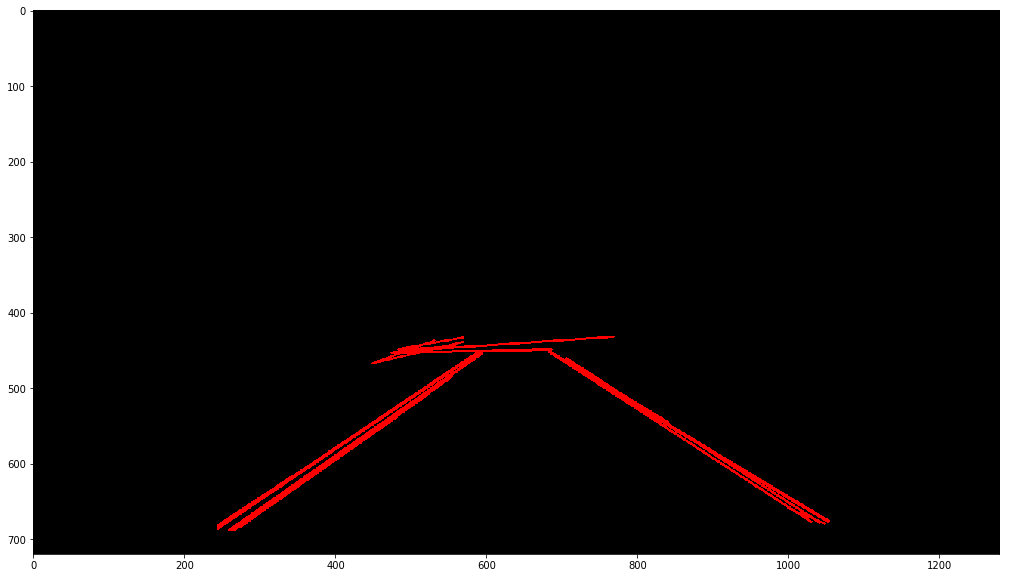

In [94]:
lines = cv2.HoughLinesP(roi_im,rho=1, theta=np.pi/180, threshold=20, minLineLength=20, maxLineGap=300)
rgb_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_img,(x1,y1),(x2,y2),color=[255, 0, 0],thickness=2)
plt.figure(figsize = (50,10))
plt.imshow(line_img)